# Estimate fluxes

This notebook is work in progress.

This will take you through the process of extracting flux information from a given transport operator.
It is split into 3 parts
1. Figure out the stencil of the operator
2. Partition the operator according to said stencil
3. Estimate the flux of a given 3D tracer field

Let's start telling Julia we will be using AIBECS and Plots.

In [1]:
using AIBECS, Plots

## Operator stencil

Let's load the OCIM0.1 circulation and grid

In [2]:
grd, T = OCIM0.load()

Loading OCIM0.1 ✔
┌ Info: You are about to use OCIM0.1 model.
│ If you use it for research, please cite:
│ 
│ - Primeau, F. W., Holzer, M., and DeVries, T. (2013), Southern Ocean nutrient trapping and the efficiency of the biological pump, J. Geophys. Res. Oceans, 118, 2547–2564, doi:10.1002/jgrc.20181.
│ - DeVries, T. and F. Primeau, 2011: Dynamically and Observationally Constrained Estimates of Water-Mass Distributions and Ages in the Global Ocean. J. Phys. Oceanogr., 41, 2381–2401, doi:10.1175/JPO-D-10-05011.1
│ 
│ You can find the corresponding BibTeX entries in the CITATION.bib file
│ at the root of the AIBECS.jl package repository.
│ (Look for the "DeVries_Primeau_2011" and "Primeau_etal_2013" keys.)
└ @ AIBECS.OCIM0 /Users/runner/runners/2.263.0/work/AIBECS.jl/AIBECS.jl/src/OCIM0.jl:54


(, 
  [1     ,      1]  =  3.43554e-7
  [2     ,      1]  =  6.15762e-8
  [57    ,      1]  =  -2.61541e-7
  [10172 ,      1]  =  -7.12375e-7
  [10229 ,      1]  =  5.46158e-7
  [1     ,      2]  =  -1.09408e-7
  [2     ,      2]  =  3.1285e-7
  [3     ,      2]  =  1.98074e-9
  [58    ,      2]  =  -2.42077e-8
  ⋮
  [191168, 191167]  =  -1.81561e-7
  [190655, 191168]  =  -2.32625e-8
  [191165, 191168]  =  -1.08131e-7
  [191167, 191168]  =  1.42112e-7
  [191168, 191168]  =  6.11855e-8
  [191169, 191168]  =  -7.25416e-8
  [190656, 191169]  =  -1.80874e-9
  [191166, 191169]  =  -7.12552e-8
  [191168, 191169]  =  3.23538e-8
  [191169, 191169]  =  4.07233e-8)

and check its stencil

In [3]:
st = stencil(T, grd)

7-element Array{CartesianIndex{3},1}:
 CartesianIndex(0, 0, 0)
 CartesianIndex(-1, 0, 0)
 CartesianIndex(0, -1, 0)
 CartesianIndex(0, 1, 0)
 CartesianIndex(0, 0, -1)
 CartesianIndex(1, 0, 0)
 CartesianIndex(0, 0, 1)

This stencil shows all the indices of the neighboring cells/boxes that can exchange tracer concentrations in that model of the circulation. Let us visualize it

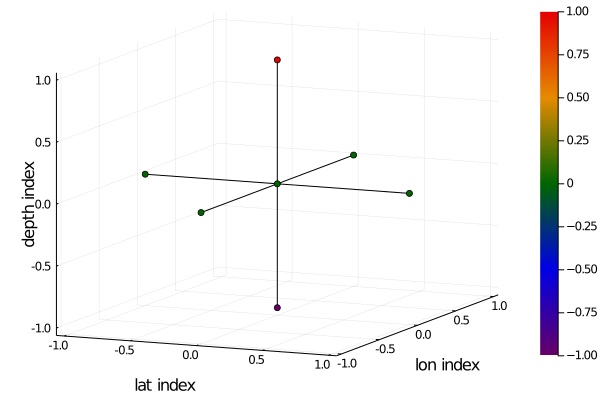

In [4]:
plotstencil(st)

This works for any circulation, so you can swap `grd` and `T` and try again... Here we plot the same figure for a few different circulations available in AIBECS.

Loading OCIM0.1┌ Warning: Over-writing registration of the datadep
│   name = AIBECS_OCIM0.1
└ @ DataDeps /Users/runner/.julia/packages/DataDeps/gbyoa/src/registration.jl:15
 ✔
┌ Info: You are about to use OCIM0.1 model.
│ If you use it for research, please cite:
│ 
│ - Primeau, F. W., Holzer, M., and DeVries, T. (2013), Southern Ocean nutrient trapping and the efficiency of the biological pump, J. Geophys. Res. Oceans, 118, 2547–2564, doi:10.1002/jgrc.20181.
│ - DeVries, T. and F. Primeau, 2011: Dynamically and Observationally Constrained Estimates of Water-Mass Distributions and Ages in the Global Ocean. J. Phys. Oceanogr., 41, 2381–2401, doi:10.1175/JPO-D-10-05011.1
│ 
│ You can find the corresponding BibTeX entries in the CITATION.bib file
│ at the root of the AIBECS.jl package repository.
│ (Look for the "DeVries_Primeau_2011" and "Primeau_etal_2013" keys.)
└ @ AIBECS.OCIM0 /Users/runner/runners/2.263.0/work/AIBECS.jl/AIBECS.jl/src/OCIM0.jl:54
Loading OCIM1 ✔
┌ Info: You are about

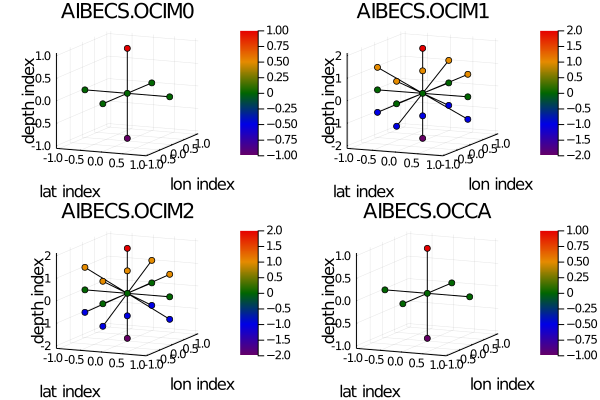

In [5]:
plts = Any[]
for Circulation in [OCIM0, OCIM1, OCIM2, OCCA]
    grd, T = Circulation.load()
    push!(plts, plotstencil(stencil(grd, T), title=string(Circulation)))
end
plot(plts..., layout=(2,2))

These stencils are important for understanding what fluxes we are talking about.

## Operator Partition

Take a cell at index $a$ with tracer concentration $A$ and its neighbour below at index $b$ and concentration $B$.
Depending on the concentrations $A$ and $B$, the transport operator removes (or adds) some tracer in $a$ and adds (or removes) it in $b$.
For each neighbour (index $k$, concentration $C_k$) in the stencil, we can compute the net flow rate from $i$ to $k$ as $$M$$

TODO
```
for k = 1:size(stencil,1)
    dck = stencil[k]
    if all(dck == 0) % no M_k for k=Id so skip the center stncil
        continue
    else
        iM = find(all(abs(dc - dck) == 0, 2)) ;
        M.(neighbour_name(dck)) = sparse(I(iM), J(iM), V(iM), nocn, nocn) - sparse(I(iM), I(iM), V(iM), nocn, nocn) ;
    end
end
```

## Flux Estimate

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*